Stock Market Prediction using Tenserflow 

# **Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). 

# Collection of data using Tiingo API

In [ ]:
import pandas_datareader as pdr
key="a28ba693f65c36f6a5fd04956664bf3a57260a81"
df = pdr.get_data_tiingo('GOOGL', api_key=key)
df.to_csv('GOOGL.csv')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
import pandas as pd
df=pd.read_csv('GOOGL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-08-03 00:00:00+00:00,664.72,666.670,657.6600,657.66,1567407,664.72,666.670,657.6600,657.66,1567407,0.0,1.0
1,GOOGL,2015-08-04 00:00:00+00:00,661.28,668.000,660.5100,664.34,1309410,661.28,668.000,660.5100,664.34,1309410,0.0,1.0
2,GOOGL,2015-08-05 00:00:00+00:00,673.29,679.910,665.5827,665.75,1812589,673.29,679.910,665.5827,665.75,1812589,0.0,1.0
3,GOOGL,2015-08-06 00:00:00+00:00,670.15,674.750,660.7300,673.99,2032984,670.15,674.750,660.7300,673.99,2032984,0.0,1.0
4,GOOGL,2015-08-07 00:00:00+00:00,664.39,668.795,658.8700,667.78,1377152,664.39,668.795,658.8700,667.78,1377152,0.0,1.0


## Data Preprocessing

In [ ]:
df1=df.reset_index()['close']
df1

0        664.72
1        661.28
2        673.29
3        670.15
4        664.39
         ...   
1254    1529.43
1255    1503.65
1256    1523.51
1257    1538.37
1258    1487.95
Name: close, Length: 1259, dtype: float64

### MinMaxScaler. Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. ... This transformation is often used as an alternative to zero mean, unit variance scaling


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.05486255]
 [0.05125055]
 [0.06386106]
 ...
 [0.95659296]
 [0.97219597]
 [0.91925492]]


### Splliting of test and training Variables

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(818, 441)

### Converting Array of Values into Datatset Matrix i.e converting into numpy arrays and reshaping of variables

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

### Reshapping into 3-D Model For LSTM 

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Creating a LSTM MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 293ms/step - loss: 0.0327 - val_loss: 0.0572
Epoch 2/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0061 - val_loss: 0.0070
Epoch 3/100
12/12 [==============================] - 3s 213ms/step - loss: 0.0026 - val_loss: 0.0059
Epoch 4/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 5/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 3s 215ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 7/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 9/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 10/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0013 - val_lo

### Prediction And Performance 

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(ytest,test_predict))

1280.1878879424874

### Plotting of Graph

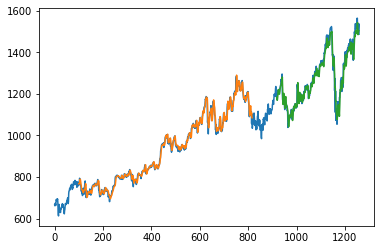

In [ ]:
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Prediction of future next 10 days

In [ ]:
from numpy import array

x_input=test_data[341:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt
plt.plot(day_new,scaler.inverse_transform(df1[1259:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))